# Rho+ Gallery

Rho+ is a smart companion toolkit for data visualization and exploration in Python. 

When doing exploratory data analysis, stopping your work to fiddle with the colors or adjust labels is an unwelcome distraction. Rho+ provides an opinionated set of default aesthetics and a collection of useful plug-in improvements to existing plotting functionality. This notebook provides a tour of what it can do.

In [3]:
# for Google Colab

%pip install rho_plus matplotlib seaborn bokeh panel jupyter-bokeh

Note: you may need to restart the kernel to use updated packages.


## The Rho+ House Style

Rho+ provides an opinionated default theme for `matplotlib`, `plotly`, `bokeh`, and `altair`. It comes in light and dark varieties.

To set things up in `matplotlib`, all you need to do is put this at the top of your notebook:

```python
import rho_plus as rp

theme, colors = rp.mpl_setup(is_dark=False)
```

Now `theme` is an `rcParams` that's been made the default, and `colors` is a list of 12 colors that form the new default sequence.

First, let's show the default `matplotlib` theme:

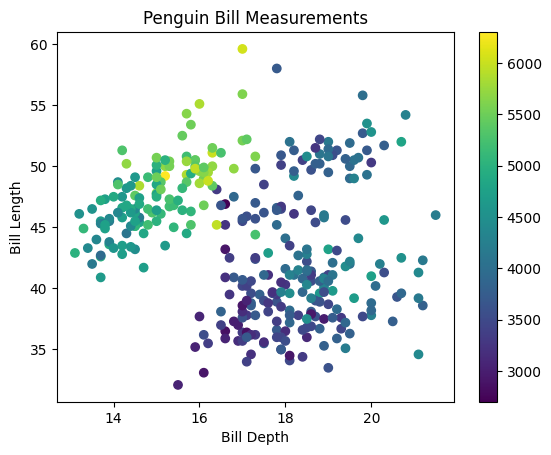

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

pg = sns.load_dataset('penguins')

def pg_plot():
    plt.scatter(data=pg, x='bill_depth_mm', y='bill_length_mm', c='body_mass_g')
    plt.colorbar()
    plt.xlabel('Bill Depth')
    plt.ylabel('Bill Length')
    plt.title('Penguin Bill Measurements')

# first: the default plot
with plt.style.context('default', after_reset=True):
    pg_plot()

Now, the Rho+ version:

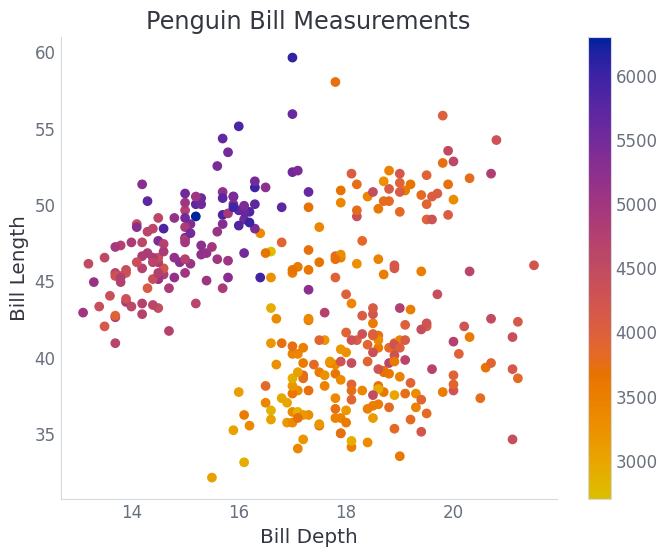

In [23]:
IS_DARK = False
theme, colors = rp.mpl_setup(IS_DARK)

pg_plot()

The highlights to notice:

 - A lot less clutter! 
 - DejaVu Sans is not the default font: instead, Rho+ uses [Source Sans](https://fonts.google.com/specimen/Source+Sans+3).
 - The default colormap has been modified: note how the brightest yellows are a little bit easier to see on white.

For late-night hacking sessions, dark mode is a must. Rho+ makes it easy to switch:

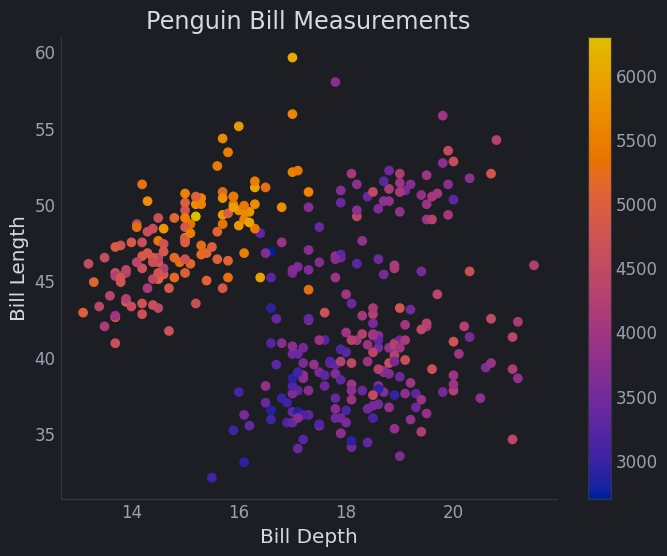

In [24]:
IS_DARK = True
theme, colors = rp.mpl_setup(IS_DARK)

pg_plot()

Note how the colormap has been flipped so the highest values are yellow and stand out against the background.

## Going Beyond Theming

There's only so much Rho+ can do by modifying the stylesheet used in Matplotlib. For more drastic changes, Rho+ has several functions that modify existing `matplotlib` plots to give them a glow-up.

### Using Formulas As Columns

Plotting functions in `matplotlib`, `seaborn`, and `plotly` accept a `data_frame` or `data` argument that lets you supply column names instead of values for the other arguments. 

Sometimes you want to do a simple adjustment to an existing column. By default, this requires adding that column to the dataframe, which involves a lot of extra typing:

<Axes: xlabel='years_after_1949', ylabel='passengers'>

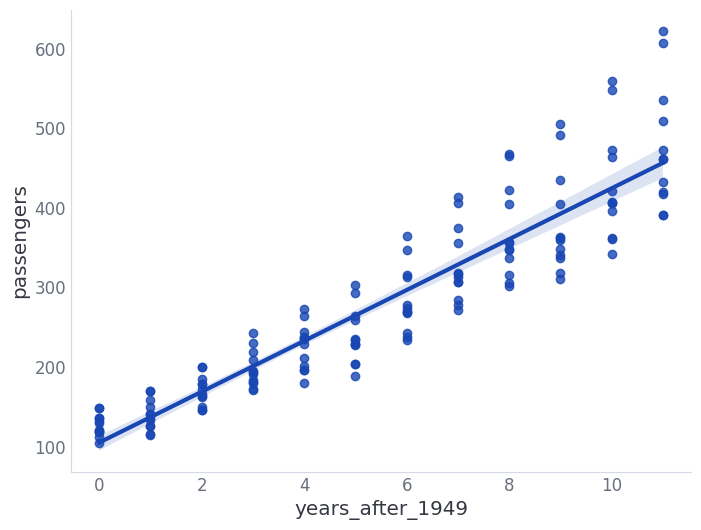

In [45]:
sns.regplot(data=flights.assign(years_after_1949=flights.eval('year - 1949')), x='years_after_1949', y='passengers')

Rho+, when set up, wraps all of these functions to instead accept expressions as column names directly. So, instead, you can do:

<Axes: xlabel='year - 1949', ylabel='passengers'>

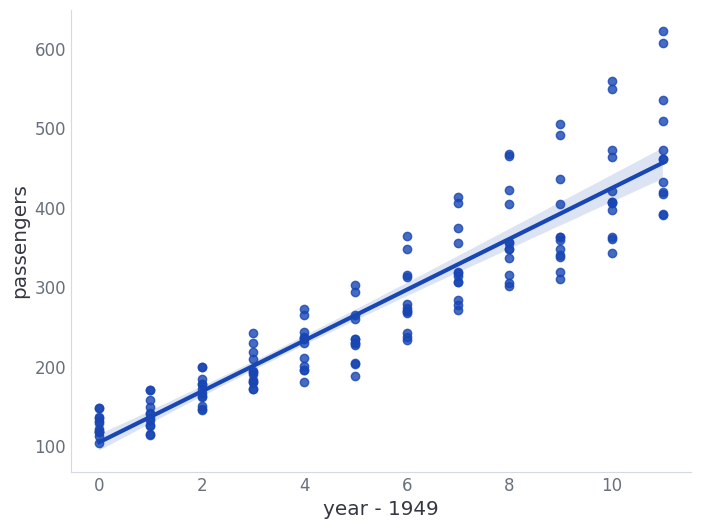

In [46]:
sns.regplot(data=flights, x='year - 1949', y='passengers')

### Custom Lineplot Labels

It can be very difficult to keep track of which line is which in a large line plot because, unlike a box plot, there's no obvious place to put a label:

<Axes: xlabel='year', ylabel='passengers'>

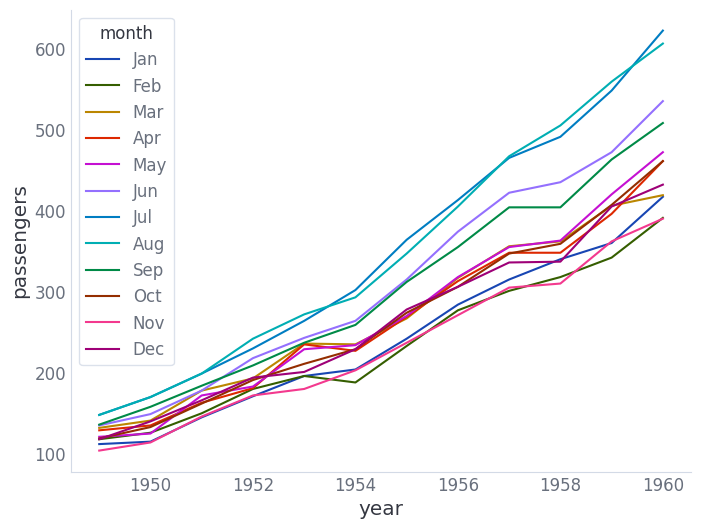

In [25]:
rp.mpl_setup(False)

flights = sns.load_dataset('flights')

sns.lineplot(data=flights, x='year', y='passengers', hue='month', lw=1.5)

Good luck trying to figure out which month is which.

With the power of `rp.line_labels()`, the legend is replaced with an annotation beside each line's final value:

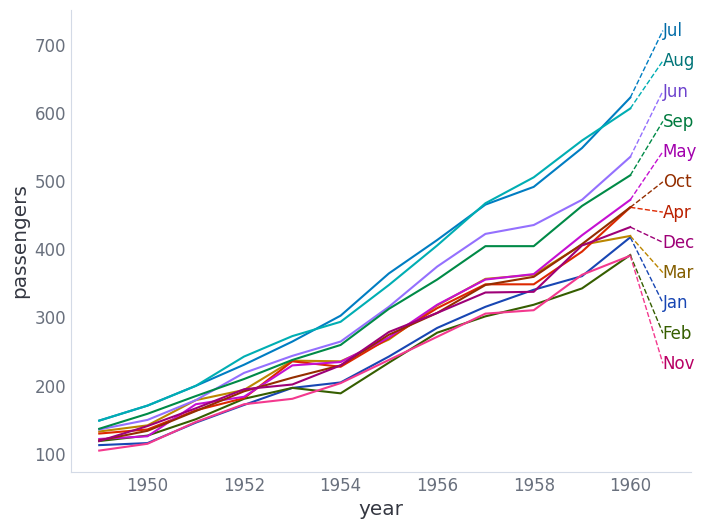

In [26]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', lw=1.5)

rp.line_labels()

Note how the line labels are shifted so they don't overlap. Like many other pieces of functionality, the goal here is something that works well enough to use in exploratory data analysis. If you're publishing in *Nature*, you may want to do things manually. (If you want to change the font size or style of the labels, change the legend label styling *before* calling `line_labels()` so Rho+ knows how big everything is.)

See what a really big text label looks like:

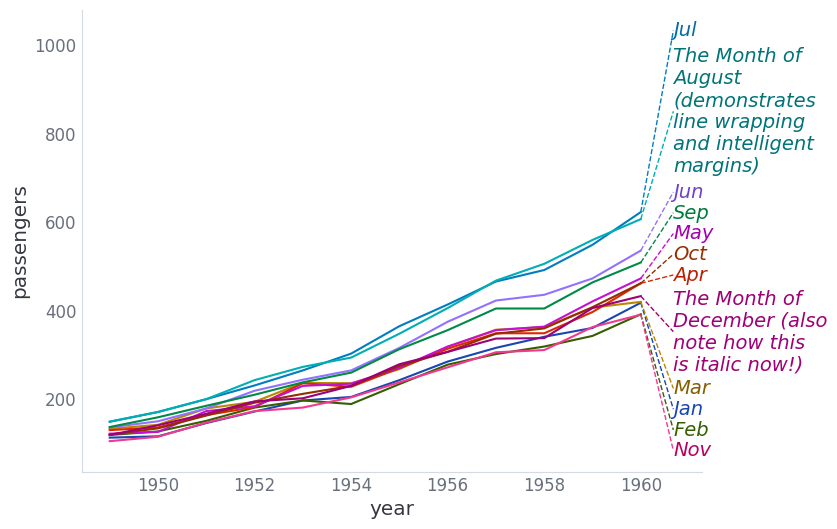

In [27]:
flights2 = flights.copy()
flights2['month'] = flights2['month'].replace(['Aug'], 'The Month of August (demonstrates line wrapping and intelligent margins)')
flights2['month'] = flights2['month'].replace(['Dec'], 'The Month of December (also note how this is italic now!)')
sns.lineplot(data=flights2, x='year', y='passengers', hue='month', lw=1.5)

rp.line_labels(size=14, style='italic')

### Automatic Scatterplot Labeling

The 2D cousin of the above line labeling function is `rp.scatter_labels()`. Consider this scatterplot:

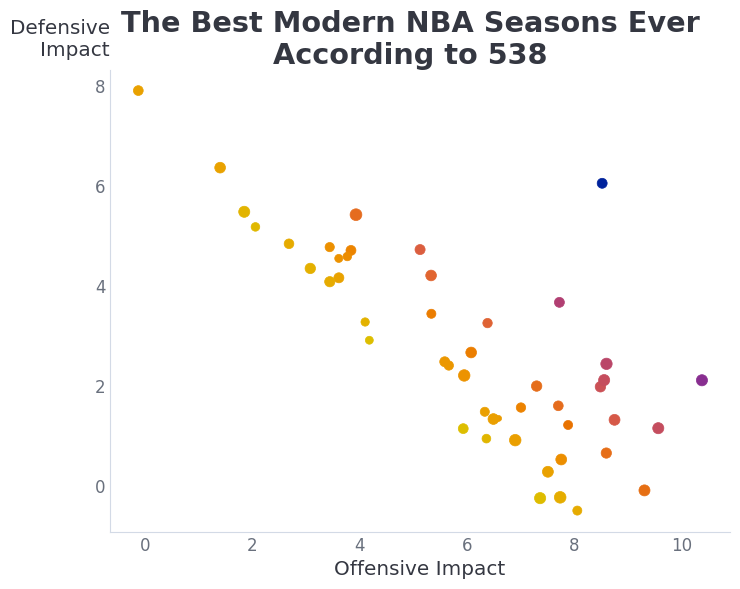

In [28]:
import pandas as pd
def raptor_plot():
    fig, ax = plt.subplots()
    raptor = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-raptor/modern_RAPTOR_by_player.csv')
    data = raptor.query('mp > 500 and raptor_total > 7')
    labels = data['player_name'] + ' (' + data['season'].astype(str) + ')'

    fig.suptitle('The Best Modern NBA Seasons Ever\nAccording to 538')
    sns.scatterplot(data=data, x='raptor_offense', y='raptor_defense', hue='raptor_total', ec=None, size='mp', legend=None, palette='rho_sequential')
    ax.set_xlabel('Offensive Impact')
    ax.set_ylabel('Defensive Impact')
    rp.ylabel_top()
    return labels

raptor_plot();

Often we're interested in outliers or just want to see the labels for a couple points. 

By adding `rp.scatter_labels()` and a list of label texts (the same order as in the plot), we can try to add as many point labels as possible. This problem is much more computationally challenging than the line labeling, so Rho+ uses simple heuristics that give good results for most plots. There are no guarantees the result is perfect, but it's better than nothing.

<Axes: xlabel='Offensive Impact', ylabel='Defensive Impact'>

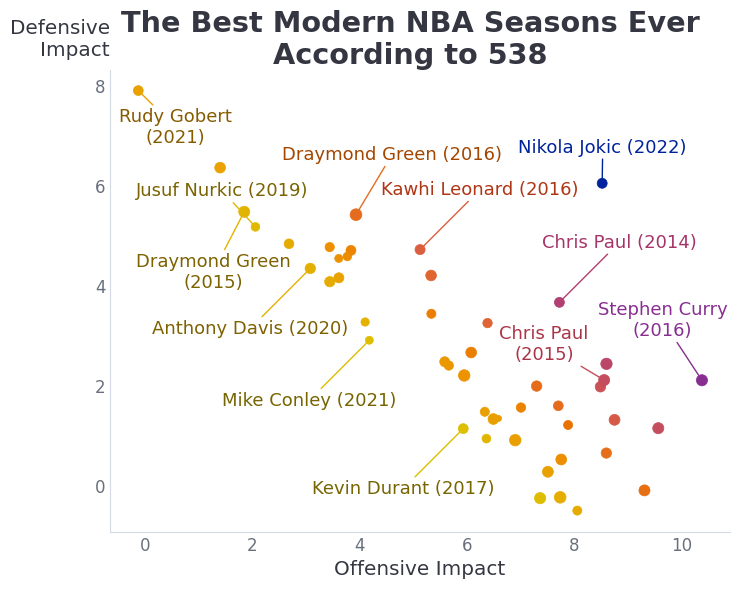

In [29]:
labels = raptor_plot();
rp.scatter_labels(labels, size=13)

Labels will be wrapped if necessary to fit them in. Rho+ will make sure the labels don't overlap with plot elements, including the legend, but it can't see the future: make sure you've plotted everything you want to plot before calling `scatter_labels()`.

### Readable Y-Axis Labels

For space efficiency, most plotting libraries have a default y-axis label that is tilted 90 degrees. If you want your label to be how all other English text is read, you can call `rp.ylabel_top()`. It turns the y-axis label right side up, moves it to the top to save some space by avoiding overlap with the y-axis tick labels, and wraps it if it would be too long.

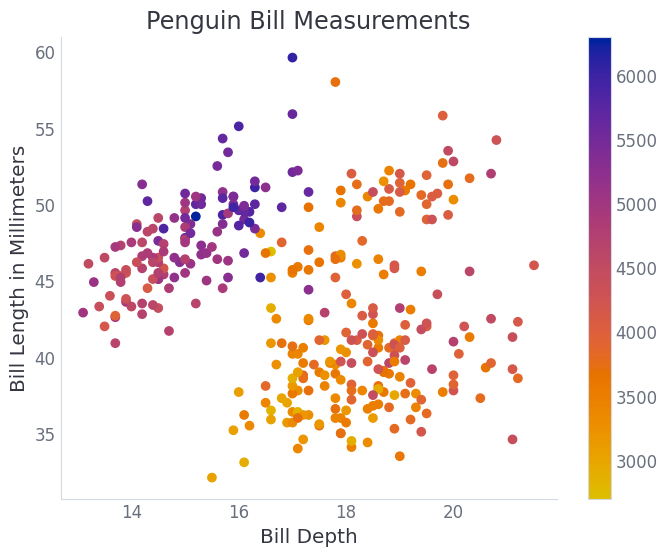

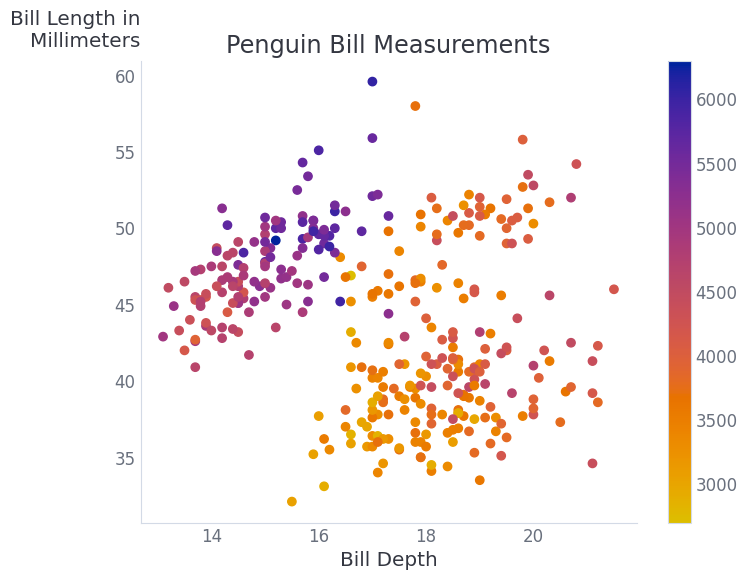

In [30]:
pg_plot()
plt.ylabel('Bill Length in Millimeters')
plt.show()

pg_plot()
plt.ylabel('Bill Length in Millimeters')
rp.ylabel_top()

### Custom Boxplot Styling

This is what a box plot looks like using just the stylesheet. It also demonstrates the default categorical color theme.

<Axes: xlabel='passengers', ylabel='month'>

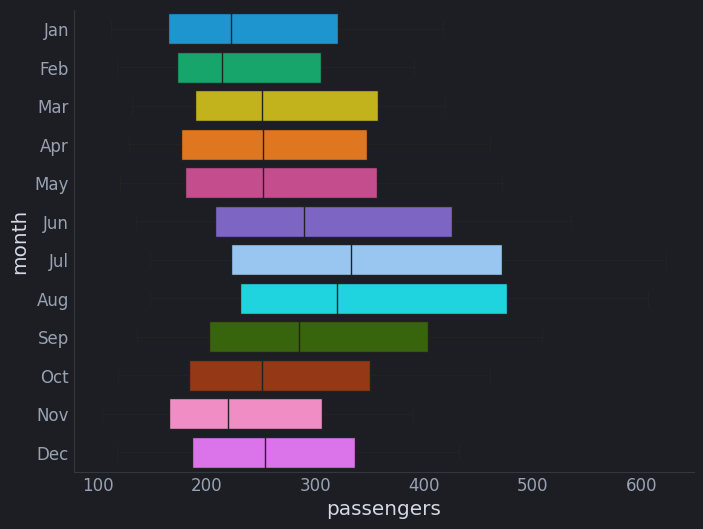

In [31]:
rp.mpl_setup(True)
sns.boxplot(data=flights, x='passengers', y='month', hue='month')

The borders and lines are invisible, and it's a bit loud with the filled colors taking up so much of the figure.

To fix the whisker styling, use `sns.rp_boxplot`, a thin wrapper over `sns.boxplot`.

To make the boxplot only colored on the edges, pass in `fill=False`.

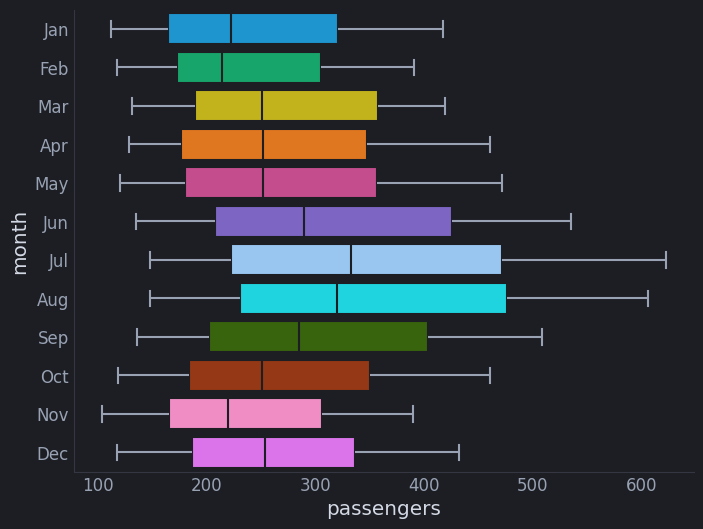

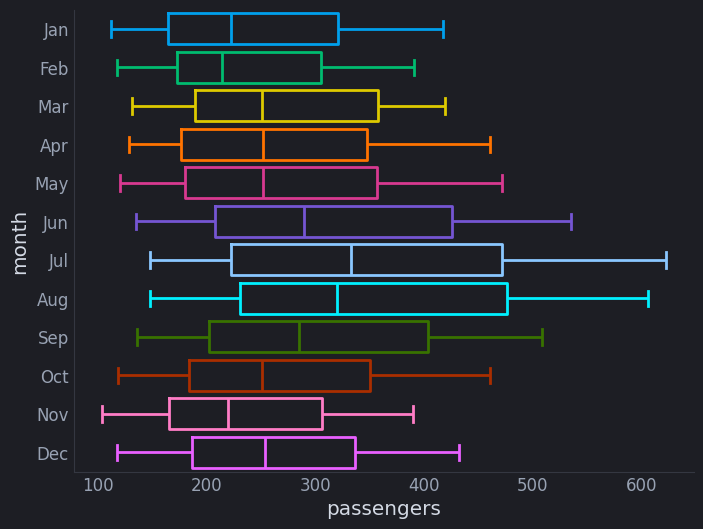

In [32]:
rp.mpl_setup(True)
sns.rp_boxplot(data=flights, x='passengers', y='month', hue='month', fill=True)
plt.show()

sns.boxplot(data=flights, x='passengers', y='month', hue='month', fill=False);

### Smarter Tick Limits

À la Edward Tufte, legend of data visualization, `rp.smart_ticks()` modifies the axis limits to show the maximium and minimum while adding negligible clutter. Pass `xaxis=False` or `yaxis=False` to only change a single axis.

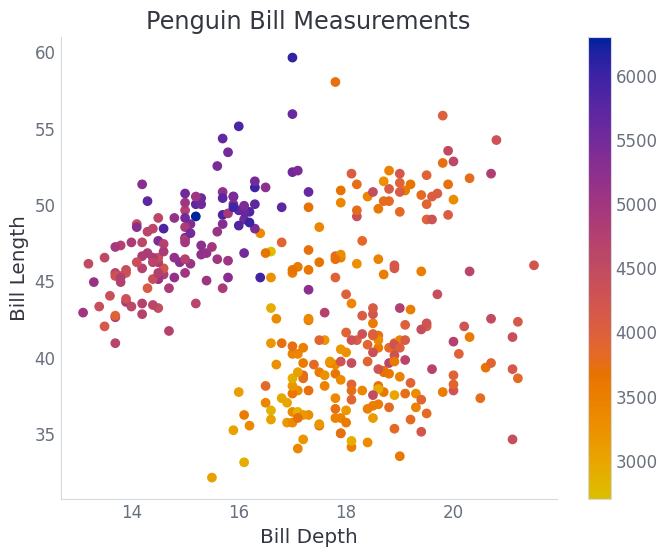

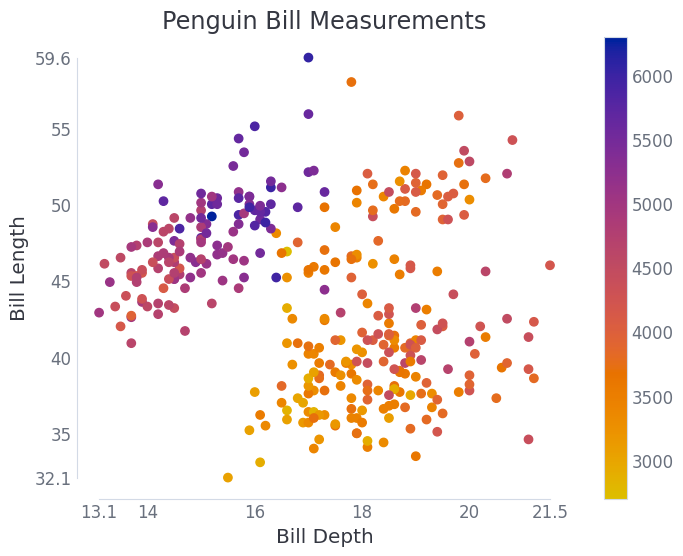

In [33]:
rp.mpl_setup(False)
pg_plot()
plt.show()

pg_plot()
rp.smart_ticks()

## Interactive Exploratory Widgets

Rho+ includes some useful features for working with the [holoviews](https://holoviews.org/) ecosystem (`panel`, `bokeh`, `holoviews`, and `hvplot`). Like above, you set things up with

```python
import rho_plus as rp

IS_DARK = True
rp.panel_setup(IS_DARK)
```

### Data Grid

Often, when doing data science, you just want to do basic spreadsheet operations on a DataFrame. Unfortunately, the default rendering of `pandas` DataFrames in VSCode or the standard notebook doesn't offer much in the way of functionality. Enter `rp.datagrid()`:

In [34]:
import rho_plus as rp

IS_DARK = False
rp.panel_setup(IS_DARK)

rp.datagrid(pg)

BokehModel(combine_events=True, render_bundle={'docs_json': {'c6d63925-2730-4bf3-a65b-a468a5a9cf4f': {'version…

This data grid, courtesy of [Perspective](https://perspective.finos.org/), has a lot of features. Drag any of the columns to the "Group By", "Split By", "Order By", or "Where" fields to start slicing and dicing the data. Hit the icon next to each column to customize that field's display.

Rho+ provides a simple wrapper that uses the current Panel dark mode setting and fills the screen horizontally.

### Object Tree Viewer

Exploring big nested objects inside a notebook can be quite challenging. Enter `rp.show_json()`:

In [17]:
rp.show_json(rp.vega_rho_dark)

BokehModel(combine_events=True, render_bundle={'docs_json': {'6a895bc1-b2bb-49a6-a97b-08b5a02bc28b': {'version…

This is a simple way of looking through an object: serializing to JSON and then displaying using a widget like this one. Hovering over an object shows its nested values, and as always it matches your existing dark mode setting.